In [1]:
# Tutorial:https://www.bilibili.com/video/BV1HJ411P7cs?p=2
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digit = load_digits()

In [3]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [19]:
data=digit.data
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
data.shape

(1797, 64)

In [20]:
label=digit.target
label

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
label.shape

(1797,)

<function matplotlib.pyplot.show(close=None, block=None)>

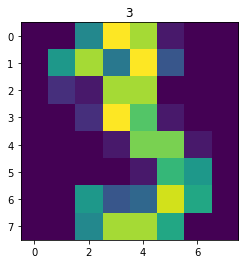

In [12]:
index=3
plt.title(label[index])
plt.imshow(data[index].reshape(8,8))
plt.show

In [13]:
num_insts,num_feats=data.shape[0],data.shape[1]

In [21]:
# 把数据和标签同步洗牌，生成随机的数据集
ridx=np.arange(num_insts)
np.random.shuffle(ridx)
ridx

array([ 909, 1418, 1117, ..., 1508, 1787,  498])

In [22]:
data=data[ridx,:]
label=label[ridx]

In [23]:
label

array([4, 3, 1, ..., 1, 5, 7])

<function matplotlib.pyplot.show(close=None, block=None)>

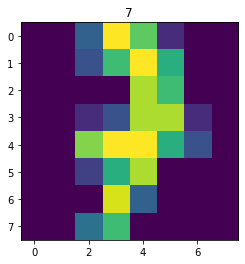

In [24]:
index=3
plt.title(label[index])
plt.imshow(data[index].reshape(8,8))
plt.show

#### 开始聚类

In [29]:
# K-means

# 初始化，聚类数为10，最终聚类结果为10张64像素的图片
num_clusters=10
kmeans_centers=np.zeros((10,64))

# 暂且先从数据集中选前十张图片作为初始的聚类结果
kmeans_centers=data[:10,:]

# 迭代次数为7，将每一次迭代的损失值放在losses列表里
num_iters=7
losses=np.zeros(7)

# dost存储每张图片与10给聚类中心图片的距离，是1797*10的矩阵
dist = np.zeros((1797,10))

#对于每次迭代
for i in range(num_iters):
    # 对于每个图片
    for j in range(num_insts):
        # 首先计算每个图片与10个聚类中心的距离
        # 将每个图片的64给像素与聚类结果的10张图片个子的64个先估算 做差再平方，得到10*64矩阵
        # distance = np.power(data[j,:]-kmeans_centers,2)
        distance = (data[j,:]-kmeans_centers)**2
        distance = np.sum(distance,axis=1)
        # 对距离平方和，开平方，得到每个图片分别与10给聚类中心图片的距离，
        # 存储在dist列表索引为j的地方
        distance = np.sqrt(distance)
        dist[j,:] = distance
    
    # 找到每张图片对应的聚类中心
    cluster_ids = np.argmin(dist,axis=1)

    # 损失函数，每张图片对应最近聚类中心的距离平均值
    losses[i] = np.mean(np.min(dist,axis=1))
    
    # 更新每个聚类中心为所属点的质心
    for k in range(num_clusters):
        # d是被划归为k类的所有图片，将d中所有图片取平均作为k类的聚类结果
        d=data[cluster_ids == k,:]
        kmeans_centers[k,:] = np.mean(d,axis=0)
print("聚类完成")

聚类完成


In [30]:
losses

array([34.67362149, 27.15280715, 26.46633038, 26.29203695, 26.16006724,
       26.02261673, 25.86376917])

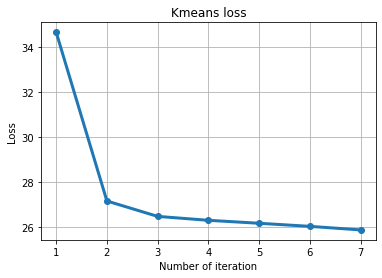

In [31]:
# 绘制损失函数随迭代次数增加而下降的曲线
plt.figure()
plt.plot(np.arange(num_iters)+1,losses,"-o",lw=3)
plt.grid(True)
plt.title("Kmeans loss")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.show()

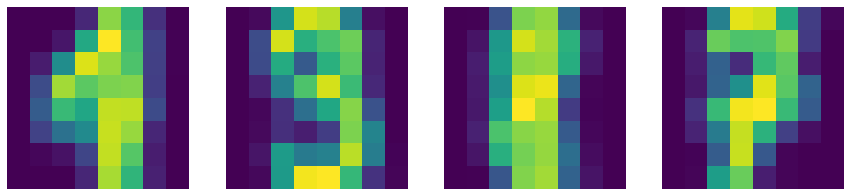

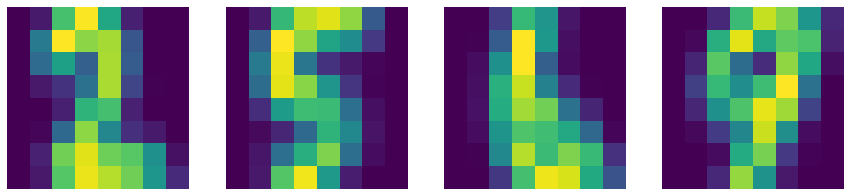

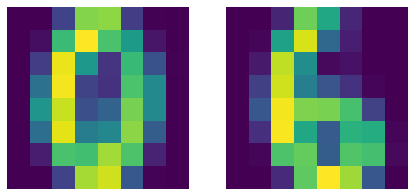

In [32]:
# 可视化十个聚类中心
for i in range(num_clusters):
    plt.style.use({'figure.figsize':(15,15)})
    column=4
    plt.subplot(1,column,i%column+1)
    plt.imshow(kmeans_centers[i].reshape(8,8))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    if i%column == column-1:
        plt.show()

#### 使用sklearn中的聚类工具包快速完成上述任务

In [33]:
import sklearn
digit=load_digits()
data=digit.data
label=digit.target

In [34]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data)
kmeans.cluster_centers_.shape

(10, 64)

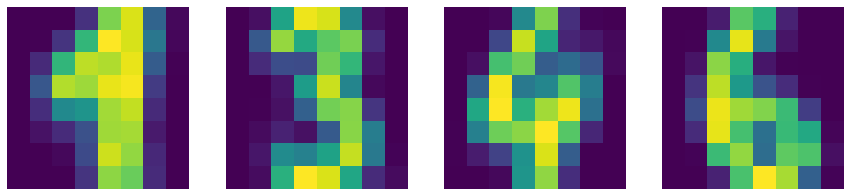

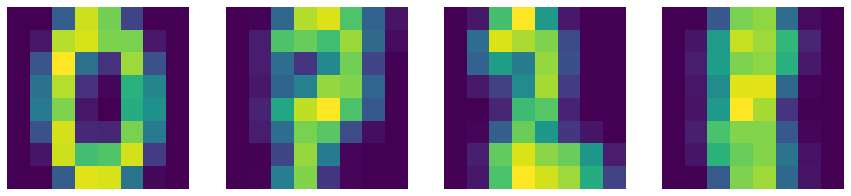

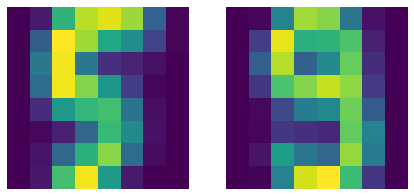

In [37]:
# 可视化十个聚类中心
for i in range(10):
    plt.style.use({'figure.figsize':(15,15)})
    column=4
    plt.subplot(1,column,i%column+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(8,8))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    if i%column == column-1:
        plt.show()